In [2]:
from scipy.stats import rv_continuous
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class failure_dist_cpu(rv_continuous):
    def __init__(self, t1, t2, b, A):
        super().__init__(a=0)
        self.t1 = t1
        self.t2 = t2
        self.b = b
        self.A = A

    def _cdf(self, t):
        return self.A * (1 - np.exp(-t / self.t1) + np.exp((t - self.b) / self.t2))

In [41]:
def simulate_n_preemptions(failure_dist: rv_continuous, n_machines=5, total_training_time=1, n_samples=1000):
    n_preemptions = []
    times = []
    ttf = []
    for i in range(n_samples):
        n_failures = 0
        training_time = 0
        t = 0
        while training_time < total_training_time:
            time_to_failure = min(failure_dist.rvs(size = n_machines))
            times.append(time_to_failure)
            training_time += time_to_failure 
            if training_time <= total_training_time:
                 n_failures += 1
            if t == 0:
                 t = training_time
                 ttf.append(t)
        #if (i%10 == 0):
        #  print(i, n_failures)
        n_preemptions.append(n_failures)
    print(max(times), min(times))
    return n_preemptions, ttf

f1 = failure_dist_cpu(t1=0.8, t2=0.8, A=0.65, b=24)
samples, ttf = simulate_n_preemptions(f1, n_machines=8, total_training_time=1, n_samples=1000)


KeyboardInterrupt: ignored

In [118]:
def simnpr(failure_dist: rv_continuous, n_machines=5, total_training_time=1, n_samples=1000):
    n_preemptions = []
    times = []
    ttf = []
    total = 0
    for i in range(n_samples):
        #print("----------------------------------------")
        n_failures = 0
        training_time = 0
        t = 0
        fails = failure_dist.rvs(size = n_machines)
        while training_time < total_training_time:
            time_to_failure = min(fails)
            fails = list(fails)
            #print(fails, training_time)
            min_idx = fails.index(time_to_failure)
            fails = [x-time_to_failure for x in fails]
            fails[min_idx] = failure_dist.rvs(size = 1)[0]
            times.append(time_to_failure)
            training_time += time_to_failure 
            if training_time <= total_training_time:
                 n_failures += 1
                 total += 1
            if t == 0:
                 t = training_time
                 ttf.append(t)
        #if (i%10 == 0):
        #  print(i, n_failures)
        n_preemptions.append(n_failures)
    print(max(times), min(times), total)
    return n_preemptions, ttf

f1 = failure_dist_cpu(t1=1.24, t2=0.7, A=0.5535, b=24)
samples, ttf = simnpr(f1, n_machines=8, total_training_time=8, n_samples=1000)


23.001915715061873 9.307532556074305e-05 9153


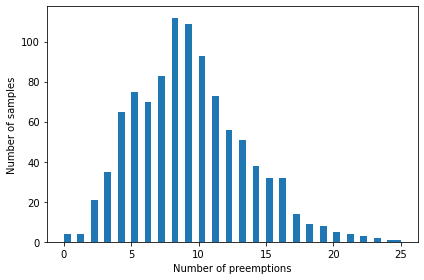

In [119]:
# plot histogram of samples
fig, ax1 = plt.subplots()
ax1.hist(list(samples), bins=50)
ax1.set_xlabel('Number of preemptions')
ax1.set_ylabel('Number of samples')


fig.tight_layout()
plt.show()


0 9


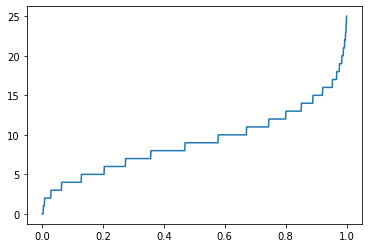

In [120]:
samples.sort()
print(samples[0],samples[500])
a = np.linspace(0,1,1000)
plt.plot(a,samples)

In [ ]:
""" =============== LEGACY =============
# plot PDF and CDF of distribution
pts = np.linspace(0, 24)
ax2 = ax1.twinx()
ax2.set_ylim(0,1.1)
ax2.set_ylabel('CDF')
ax2.plot(pts, f1.cdf(pts), color='orange', label='CDF')
ax2.legend(loc='upper center')
"""

[0.         0.01637192 0.03233147 0.04788904 0.06305475 0.07783847
 0.09224983 0.1062982  0.11999273 0.13334232 0.14635567 0.15904125
 0.1714073  0.18346189 0.19521285 0.20666783 0.21783429 0.2287195
 0.23933053 0.24967429 0.25975752 0.26958678 0.27916847 0.28850881
 0.29761389 0.30648964 0.31514183 0.3235761  0.33179792 0.33981266
 0.34762552 0.3552416  0.36266585 0.3699031  0.37695806 0.38383532
 0.39053936 0.39707454 0.40344512 0.40965524 0.41570894 0.42161016
 0.42736274 0.43297044 0.43843688 0.44376564 0.44896018 0.45402389
 0.45896005 0.46377188]


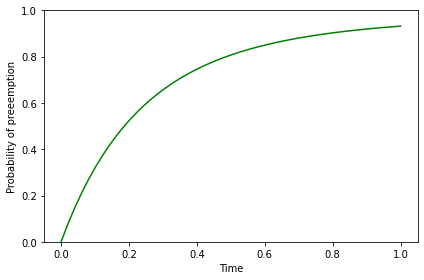

In [109]:
A = 0.4
b = 24
t1 = 0.8
t2 = 0.8

def pdf(t):
    return A * ((1 / t1) * np.exp(-t / t1) + (1 / t2) * np.exp((t - b) / t2))

def pdf_n(t, n):
    return 1 - (1 - pdf(t)) ** n

def cdf(t):
    return A * (1 - np.exp(-t / t1) + np.exp((t - b) / t2))

def cdf_n(t, n):
    return 1 - (1 - cdf(t)) ** n



class failure_dist_n(rv_continuous):
    def __init__(self, n):
        super().__init__(a=0)
        self.n = n

    def _cdf(self, t):
        return cdf_n(t, self.n)


pts = np.linspace(0, 1)
print(f1.cdf(pts))
fig, ax = plt.subplots()
f1 = failure_dist_n(n = 8)

ax.plot(pts, f1.cdf(pts), color='green', label='CDF_1')
# f1 = failure_dist_n(n = 2)
# ax.plot(pts, f1.cdf(pts), color='orange', label='CDF_2')
# f1 = failure_dist_n(n = 4)
# ax.plot(pts, f1.cdf(pts), color='blue', label='CDF_4')
#f1 = failure_dist_n(n = 16)
#ax.plot(pts, f1.cdf(pts), color='red', label='CDF_8')
# f1 = failure_dist_n(n = 256)
# ax.plot(pts, f1.cdf(pts), color='magenta', label='CDF_256')
#ax.plot(pts, cdf_n(1,pts), color='magenta', label='PDF_4')
# ax.plot(pts, pdf_n(pts, 8), color='red', label='PDF_8')
# ax.plot(pts, pdf_n(pts, 32), color='blue', label='PDF_32')
# ax.plot(pts, pdf_n(pts, 256), color='blue', label='PDF_256')
ax.set_ylim([0,1])
ax.set_ylabel('Probability of preeemption')
ax.set_xlabel('Time')
# ax.legend(loc='upper center')
fig.tight_layout()
plt.show()

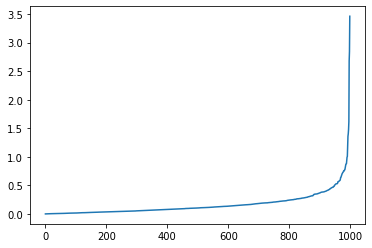

In [37]:
ttf.sort()
plt.plot(ttf)